In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\Shruti\ Python files\.ipynb_checkpoints\anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [8]:
df['anime_id'].nunique() 

12294

In [10]:
df['type'].nunique()

6

<Axes: xlabel='count', ylabel='type'>

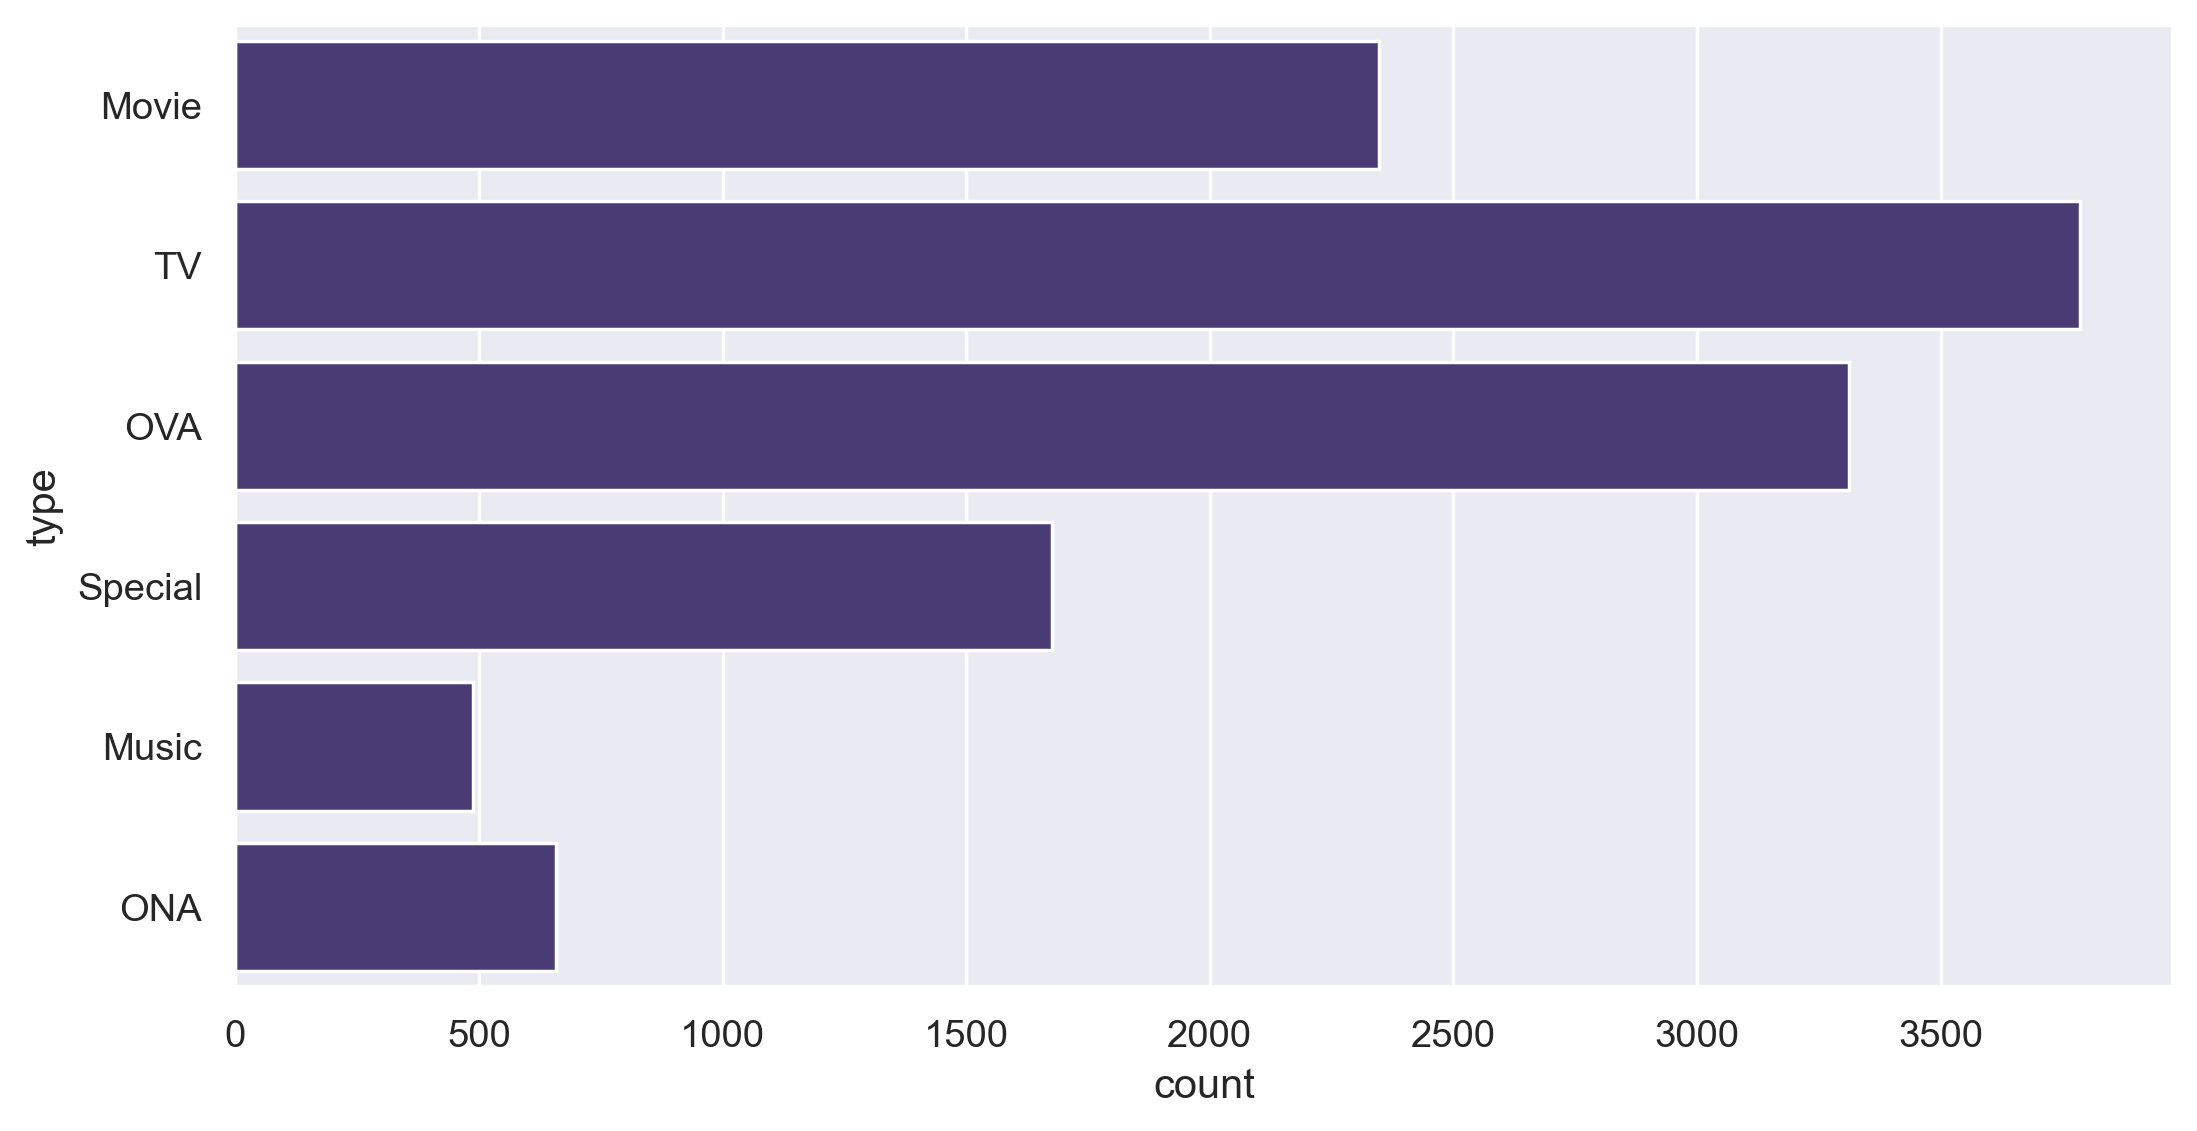

In [12]:
sns.countplot(y = df['type'])

In [18]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# Model Building

In [28]:
pivot = pd.pivot(data=df, index = 'anime_id',columns='type', values='rating')

In [30]:
pivot

type,NaN,Movie,Music,ONA,OVA,Special,TV
anime_id,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,8.82
5,NaN,8.4,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,8.32
7,NaN,NaN,NaN,NaN,NaN,NaN,7.36
8,NaN,NaN,NaN,NaN,NaN,NaN,7.06
...,...,...,...,...,...,...,...
34514,NaN,NaN,NaN,7.21,NaN,NaN,NaN
34519,NaN,NaN,NaN,NaN,NaN,5.67,NaN
34522,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
pivot.fillna(0,inplace=True)

In [34]:
pivot

type,NaN,Movie,Music,ONA,OVA,Special,TV
anime_id,,,,,,,
1,0.0,0.0,0.0,0.00,0.0,0.00,8.82
5,0.0,8.4,0.0,0.00,0.0,0.00,0.00
6,0.0,0.0,0.0,0.00,0.0,0.00,8.32
7,0.0,0.0,0.0,0.00,0.0,0.00,7.36
8,0.0,0.0,0.0,0.00,0.0,0.00,7.06
...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,7.21,0.0,0.00,0.00
34519,0.0,0.0,0.0,0.00,0.0,5.67,0.00
34522,0.0,0.0,0.0,0.00,0.0,0.00,0.00


In [36]:
from sklearn.metrics.pairwise import cosine_similarity                    #Calculate the distances and similarity

In [38]:
sim = cosine_similarity(pivot)
sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
pd.DataFrame(sim)

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
np.fill_diagonal(sim,0)

In [46]:
pd.DataFrame(sim)

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
similarity = pd.DataFrame(sim)
similarity

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [52]:
df['anime_id'].unique()

array([32281,  5114, 28977, ...,  5621,  6133, 26081], dtype=int64)

In [54]:
similarity.index = df['anime_id'].unique()
similarity.columns = df['anime_id'].unique()

In [56]:
similarity

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
32281,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
#find out simliar users

In [60]:
similarity.idxmax()

32281    28977
5114        44
28977    32281
9253     32281
9969     32281
         ...  
9316      1695
5543       329
5621     32281
6133     32281
26081    32281
Length: 12294, dtype: int64

In [64]:
df[(df['anime_id'] == 32281) | (df['anime_id'] == 28977)]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [68]:
df[(df['anime_id'] == 5621) | (df['anime_id'] == 32281)]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219


In [70]:
pivot

type,NaN,Movie,Music,ONA,OVA,Special,TV
anime_id,,,,,,,
1,0.0,0.0,0.0,0.00,0.0,0.00,8.82
5,0.0,8.4,0.0,0.00,0.0,0.00,0.00
6,0.0,0.0,0.0,0.00,0.0,0.00,8.32
7,0.0,0.0,0.0,0.00,0.0,0.00,7.36
8,0.0,0.0,0.0,0.00,0.0,0.00,7.06
...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,7.21,0.0,0.00,0.00
34519,0.0,0.0,0.0,0.00,0.0,5.67,0.00
34522,0.0,0.0,0.0,0.00,0.0,0.00,0.00


In [72]:
similarity

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
32281,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
def recommend_movies(user_id, ratings_matrix, user_similarity, top_n=5):
    similar_users = user_similarity.loc[user_id][user_similarity.loc[user_id] == 1].index.tolist()
    
    recommendations = ratings_matrix.loc[similar_users].mean(axis=0)  #Calculate the average rating for each movie across the similar users.
    recommendations = recommendations[ratings_matrix.loc[user_id] == 0]  #Filter out movies that the target user (user_id) has already rated.

    #Sort movies by their average ratings in descending order and return the top n movie IDs.
    return recommendations.sort_values(ascending=False).head(top_n).index.tolist()

In [76]:
recommend_movies(5,pivot,similarity)

['TV', 'OVA', 'Special', 'ONA', 'Music']

In [80]:
# Example usage
recommended_movies = recommend_movies(28977, pivot, similarity, top_n=5)
print("Recommended Movies for User :", recommended_movies)

Recommended Movies for User : ['OVA', 'Movie', 'Special', 'ONA', 'Music']


In [84]:
similar_users = similarity.loc[32281][similarity.loc[32281] == 1].index.tolist()
similar_users

[28977,
 9253,
 9969,
 32935,
 11061,
 820,
 15335,
 15417,
 4181,
 28851,
 918,
 2904,
 28891,
 199,
 23273,
 24701,
 12355,
 1575,
 263,
 30276,
 17074,
 2001,
 32983,
 28957,
 11665,
 11741,
 31757,
 19,
 12365,
 1535,
 32366,
 30654,
 20583,
 19647,
 4282,
 10379,
 22135,
 21329,
 31043,
 7785,
 3297,
 30709,
 6114,
 31240,
 4565,
 5300,
 9989,
 24415,
 11577,
 26055,
 7472,
 28735,
 12431,
 578,
 16894,
 5028,
 21,
 801,
 31933,
 5205,
 17389,
 170,
 10162,
 18617,
 32182,
 877,
 2251,
 24687,
 16498,
 5941,
 30346,
 3784,
 13125,
 12029,
 14397,
 10087,
 14719,
 13601,
 22789,
 30230,
 18115,
 11981,
 205,
 32282,
 6594,
 7655,
 2246,
 25835,
 2921,
 136,
 30503,
 12531,
 523,
 2559,
 392,
 486,
 11771,
 1698,
 5341,
 25781,
 10863,
 28701,
 5420,
 32,
 4224,
 2236,
 31181,
 45,
 2418,
 1365,
 22297,
 627,
 10937,
 23755,
 4155,
 1889,
 137,
 139,
 23317,
 558,
 5040,
 57,
 33,
 5,
 6336,
 20651,
 338,
 13759,
 6547,
 5081,
 32867,
 264,
 12859,
 6746,
 513,
 1142,
 6811,
 16664,

In [86]:
pivot

type,NaN,Movie,Music,ONA,OVA,Special,TV
anime_id,,,,,,,
1,0.0,0.0,0.0,0.00,0.0,0.00,8.82
5,0.0,8.4,0.0,0.00,0.0,0.00,0.00
6,0.0,0.0,0.0,0.00,0.0,0.00,8.32
7,0.0,0.0,0.0,0.00,0.0,0.00,7.36
8,0.0,0.0,0.0,0.00,0.0,0.00,7.06
...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,7.21,0.0,0.00,0.00
34519,0.0,0.0,0.0,0.00,0.0,5.67,0.00
34522,0.0,0.0,0.0,0.00,0.0,0.00,0.00


In [88]:
pivot.loc[similar_users].mean(axis=0)

type
NaN        0.000000
Movie      1.192202
Music      0.182842
ONA        0.292264
OVA        1.507728
Special    0.845232
TV         2.555371
dtype: float64

# Interview Questions:

### 1. Can you explain the difference between user-based and item-based collaborative filtering?

User-Based Collaborative Filtering: Finds users similar to the target user and recommends items those users liked. Focuses on user similarity.

Item-Based Collaborative Filtering: Finds items similar to those the user liked and recommends them. Focuses on item similarity.

### 2. What is collaborative filtering, and how does it work?

 Collaborative filtering is a method used in recommendation systems to predict what a user might like based on the preferences of similar users. 
It works by analyzing past interactions (like ratings or purchases) to identify patterns.

There are two types:

User-based: Recommending items liked by similar users.

Item-based: Recommending items similar to those the user has liked.